# Hand-Sign Detection

### Importing required libraries and functions

In [1]:
import numpy as np
# Image handling library openCV
import cv2
# Library to access data from folders
import os
# Function to split the dataset into train and test
from sklearn.model_selection import train_test_split
# Utilities for the Model 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, Flatten,BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.regularizers import l1,l2
from keras.preprocessing.image import ImageDataGenerator
# Plotting Library
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Using cv2.imshow in Colab.
from google.colab.patches import cv2_imshow

In [3]:
# The place where the data is stored
folder = '/content/drive/My Drive/Sign_Language_digits'
list_folders = os.listdir(folder)

### Reading data from folders and resizing all images to the same shape

In [4]:
X = []
Y = []

for a in list_folders:
  l = os.listdir(folder + '/' + a)
  for b in l:
    im = cv2.imread(folder+'/'+a+'/'+b)
    im = cv2.resize(im, dsize = (100,100))
    X.append(im)
    Y.append(int(a))
  print(a)

7
5
8
6
9
4
1
0
3
2


In [5]:
# Convert the list into a Numpy array and check its shape
X = np.array(X)
X.shape

(2062, 100, 100, 3)

In [6]:
# X_n is a normalised version of the input images
X_n = (X/255) - 0.5

In [7]:
X_n.shape

(2062, 100, 100, 3)

In [8]:
# Check the target data shape, convert it to numpy array.
Y = np.array(Y)
Y= Y.reshape((2062,1))
Y.shape

(2062, 1)

In [9]:
# Get the one hot encoded version of target
Y = to_categorical(Y)

## Model Building

In [10]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)      

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=42)

### Image data Augumentation: Applies random filters to data such as zooming in, rotating etc.. It helps gather more training data and makes model more versatile 

In [12]:
datagen = ImageDataGenerator( 
        rotation_range=10,  # randomly rotate images in the range of 0-180 degrees
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        )


datagen.fit(X_train)

## Training

# Fit the model

In [13]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size = 16) ,epochs = 100 )

Epoch 1/100
116/116 [==============================] - 11s 94ms/step - loss: 2.3616 - accuracy: 0.3181
Epoch 2/100
116/116 [==============================] - 8s 72ms/step - loss: 0.9837 - accuracy: 0.6528
Epoch 3/100
116/116 [==============================] - 8s 72ms/step - loss: 0.6254 - accuracy: 0.7887
Epoch 4/100
116/116 [==============================] - 8s 72ms/step - loss: 0.4266 - accuracy: 0.8658
Epoch 5/100
116/116 [==============================] - 8s 72ms/step - loss: 0.3405 - accuracy: 0.8830
Epoch 6/100
116/116 [==============================] - 8s 71ms/step - loss: 0.3421 - accuracy: 0.8841
Epoch 7/100
116/116 [==============================] - 8s 72ms/step - loss: 0.2337 - accuracy: 0.9197
Epoch 8/100
116/116 [==============================] - 8s 72ms/step - loss: 0.2232 - accuracy: 0.9267
Epoch 9/100
116/116 [==============================] - 8s 72ms/step - loss: 0.2690 - accuracy: 0.9208
Epoch 10/100
116/116 [==============================] - 8s 72ms/step - loss: 0.19

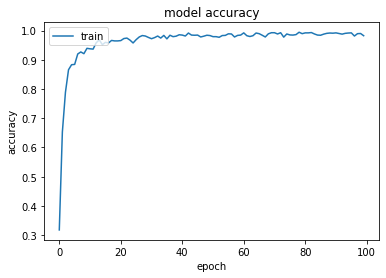

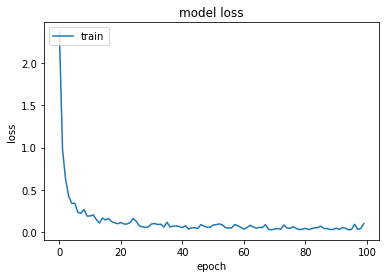

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Testing

In [15]:
y_hat = model.predict_classes(X_test)
y_hat = to_categorical(y_hat)

In [16]:
m = tf.keras.metrics.Accuracy()
m.update_state(Y_test,y_hat)
m.result().numpy()

0.9932367

### The accuracy on the Test Set picked randomly is 99.32 percent

# Saving model

In [17]:
model.save('Hand_sign_model.h5') 

# Predictions from model saved

In [18]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/Hand_sign_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)      

# The loaded model can now be used to make predictions